## Setup

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Load iris dataset from scikit-learn library

In [2]:
# Load data
iris = datasets.load_iris()
# Select last two dimensions
X = iris.data[:,2:] 
# Normalize data
X[:,0] = X[:,0]  / np.max(X[:,0])
X[:,1] = X[:,1]  / np.max(X[:,1])
# Print data shape
print('X shape:', X.shape)

X shape: (150, 2)


Plot our dataset

Text(0, 0.5, 'Petal Width (cm)')

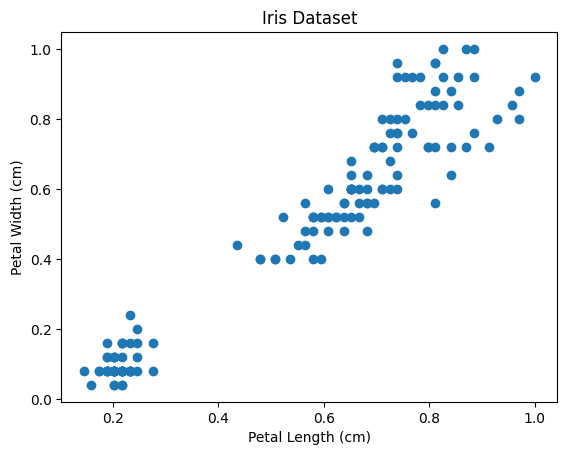

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.title('Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

## K Mean Clustering

1. __Initialization__: Start by randomly selecting K points from the dataset. These points will act as the initial cluster centroids.
2. __Assignment__: For each data point in the dataset, calculate the distance between that point and each of the K centroids. Assign the data point to the cluster whose centroid is closest to it. This step effectively forms K clusters.
3. __Update centroids__: Once all data points have been assigned to clusters, recalculate the centroids of the clusters by taking the mean of all data points assigned to each cluster.
4. __Repeat__: Repeat steps 2 and 3 until convergence. Convergence occurs when the centroids no longer change significantly or when a specified number of iterations is reached.
5. __Final Result__: Once convergence is achieved, the algorithm outputs the final cluster centroids and the assignment of each data point to a cluster.


In [57]:
#  Initalize random clusters
total_clusters = 3
C = np.random.rand(total_clusters,2)
C_trajectory = C[None].copy()

total_iterations = 100
for _ in range(total_iterations):
    # Assign each point to a centroid
    assignments = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        assignments[i] = np.argmin(np.linalg.norm(C - x, axis=1))

    # Calculate new centroids
    C_new = np.zeros_like(C)
    for i in range(C.shape[0]):
        mean = np.mean(X[assignments == i], axis=0)
        if np.isnan(mean).any():
            C_new[i] = C[i]#np.random.rand(len(np.mean(X[assignments == i], axis=0)))
        else:
            C_new[i] = mean
    
    
    # Check For convergence
    print('Change in C:', np.linalg.norm(C - C_new))
    if np.linalg.norm(C - C_new) == 0:
        break
    
    # Update new cluster centers
    C = C_new
    C_trajectory = np.concatenate([C_trajectory, C[None]], axis=0)

Change in C: 0.6555644406022637
Change in C: 0.19171320891914728
Change in C: 0.07203357683722277
Change in C: 0.014831852743187305
Change in C: 0.0


Plot results of k-means clustering

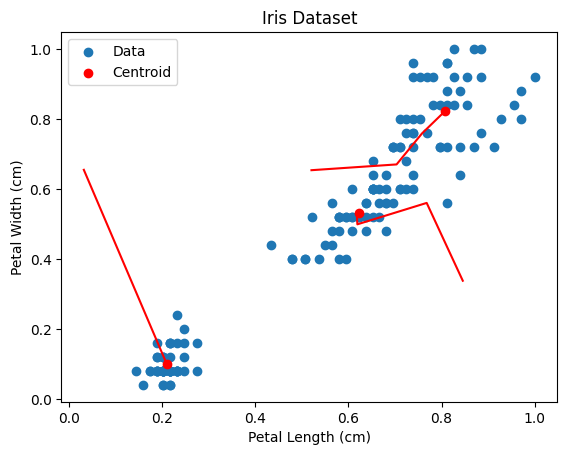

In [60]:
plt.scatter(X[:,0], X[:,1], label='Data')
plt.scatter(C[:,0], C[:,1], c='red', label='Centroid')
for i in range(C_trajectory.shape[1]):
    plt.plot(C_trajectory[:,i,0], C_trajectory[:,i,1], c='red')
plt.title('Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()